In [6]:
%matplotlib inline

from Bio import Phylo
from io import StringIO

tree = Phylo.read("tree.nwk", "newick")

Phylo.draw_ascii(tree)

 , hu.39
 |
 | rh.50
 |
 , rh.57
 |
 | rh.51
 |
 | rh.49
 |
_, rh.53
 |
 | rh.64
 |
 , rh.61
 |
 |, rh.58
 ||
 ||                              , pi.2
 ||          ____________________|
 ||         |                    |, pi.3
 ||         |                    ||
 ||         |                     | pi.1
 ||         |
 ||         |           , rh.10
 ||        _|          ,|
 ||       | |          ||, bb.1
 ||       | |          |||
 ||       | |   _______| | bb.2
 ||       | |  |       |
 ||       | |  |       | _ hu.17
 ||       | |  |       ||
 ||       | |__|        | hu.6
 ||       |    |
 ||       |    |    ______ rh.2
 ||       |    |   |
 ||       |    |___|         __ rh.40
 ||       |        |        |
 ||       |        |________|, hu.67
 ||       |                 ||
 ||       |                 |, hu.37
 ||       |                  |
 ||       |                  |, hu.40
 ||       |                  ||
 ||       |                  || hu.66
 ||       |                  ||
 ||  

In [2]:
from Bio import SeqIO

#Lists the id of the sequences in a cluster.  Create a new list for each one
list_cluster_seqs = ["rh.35", "rh.36", "rh.37"]
my_recs = []

for seq_rec in SeqIO.parse("seqs.fa", "fasta"):
    #creates a new fasta file for the sequences specified
    if seq_rec.id in list_cluster_seqs: 
        my_recs.append(seq_rec)
   
SeqIO.write(my_recs, open("cluster1.fa", "w"), "fasta")

#Use the muscle function in the terminal to make an aligned fasta file  

3

SingleLetterAlphabet() alignment with 3 rows and 2190 columns
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.35
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.36
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.37
AAA
2190
3


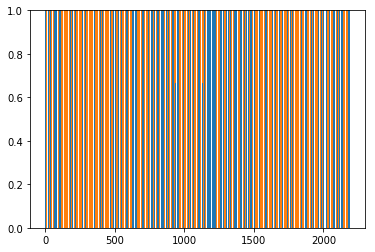

In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Bio import AlignIO
from Bio.Alphabet import IUPAC, Gapped
from Bio.Align import MultipleSeqAlignment

#Making an AlignIO table for each aligned sequence file
align = AlignIO.read(open("cluster1.aligned.fa"), "fasta")

#Practicing indexing the MSA object
print(align)
print(align[:,0])
print(align.get_alignment_length())
print(len(align))

#Lists for percentages of GC and AT content
listOfAT = []
listOfGC = []

for num in range(align.get_alignment_length()):
    Npos = align[:,num];
    #calculates number of AT and GC nucleotides over number of compared sequences
    ATsum = (Npos.count("A")+Npos.count("T"))/len(Npos)
    GCsum = (Npos.count("G")+Npos.count("C"))/len(Npos)
    #adds content percentages to a lists
    listOfAT.append(ATsum)
    listOfGC.append(GCsum)

#line_out is the name of the graph.  bottom function sets the bottom
#of the second data set at the top of the first.
line_out = plt.bar(height = listOfAT, x = range(2190))
line_out = plt.bar(height = listOfGC, bottom = listOfAT, x = range(2190))

#Do this for four clusters
    